In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd

In [2]:
# Set up data source directory 
%cd /Users/luke/Desktop/MDS/DSCI 525/DSCI-525-Group-17

/Users/luke/Desktop/MDS/DSCI 525/DSCI-525-Group-17


In [4]:
# Necessary metadata
article_id = 14096681  
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "data/"

In [3]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text) 
files = data["files"]            
files

NameError: name 'url' is not defined

In [ ]:
%%time
files_to_dl = ["data.zip"]
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

In [ ]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

In [ ]:
%%time
# Combine csv files into one pandas data frame
files = glob.glob('data/*.csv')
df = pd.concat((pd.read_csv(file, index_col=0)
                .assign(model=file.split('/')[1].split('_')[0])
                for file in files)
              )
df.to_csv("data/combined_data.csv")

In [ ]:
%%time
counts = pd.Series(dtype=int)
for chunk in pd.read_csv("data/combined_data.csv", chunksize=10_000_000):
    chunk['time'] = pd.to_datetime(chunk['time'])
    counts = counts.add(chunk[(chunk['time'] >=pd.to_datetime(2000)) & (chunk['rain (mm/day)'] >1)]["rain (mm/day)"].value_counts(), fill_value=0)
print(counts.astype(int))

In [6]:
%%time
# EDA
count_rainy_days = pd.Series(dtype=int)
for chunk in pd.read_csv("data/combined_data.csv", chunksize=10_000_000, usecols=["rain (mm/day)"]):
    count_rainy_days = count_rainy_days.add(chunk[(chunk > 10)], fill_value=0)

count_rainy_days = count_rainy_days.dropna()
print((count_rainy_days))

          rain (mm/day)
10000012      24.457625
10000013      20.367342
10000014      33.328206
10000031      16.203621
10000039      10.811434
...                 ...
72233282      52.754753
72233291      17.760353
72233293      17.165935
72233304      10.005026
72233306      68.117489

[3106025 rows x 1 columns]
CPU times: user 27.6 s, sys: 59.2 s, total: 1min 26s
Wall time: 1min 43s


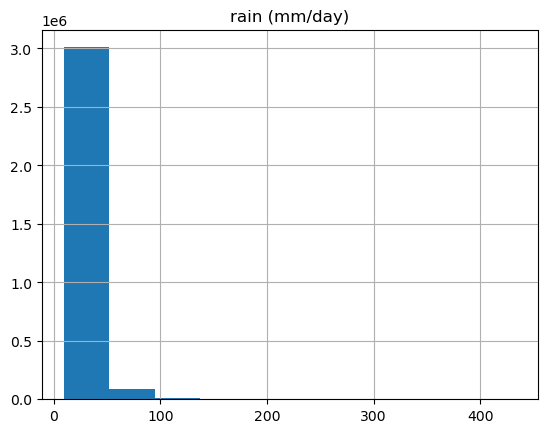

In [7]:
count_rainy_days.hist();

In [8]:
%load_ext rpy2.ipython

In [9]:
%%R
suppressMessages(library(dplyr))
suppressMessages(library(readr))
suppressMessages(library(ggplot2))

In [10]:
%%R -i count_rainy_days
head(count_rainy_days)


         rain (mm/day)
10000012      24.45762
10000013      20.36734
10000014      33.32821
10000031      16.20362
10000039      10.81143
10000043      18.19375


In [ ]:
%%time
%%R
# count_rainy_days <- read_csv("data/combined_data.csv")
# result <- count_rainy_days %>%
#     filter(`rain (mm/day)` >10) 
print()

In [11]:
%%R
summary(count_rainy_days)

 rain (mm/day)   
 Min.   : 10.00  
 1st Qu.: 12.54  
 Median : 16.45  
 Mean   : 20.66  
 3rd Qu.: 23.99  
 Max.   :432.94  


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


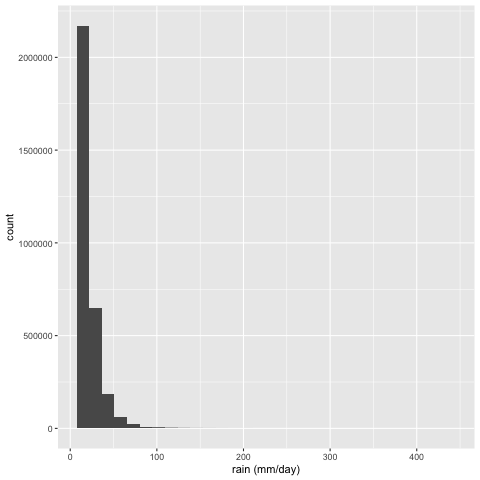

CPU times: user 1.37 s, sys: 119 ms, total: 1.49 s
Wall time: 3.98 s


In [13]:
%%time
%%R
ggplot(count_rainy_days) +
    geom_histogram(aes(x = `rain (mm/day)`))

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken Q4|Time taken Q5|
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|:----------:|
| Shirley    |                  |     |           |        |            |          |
| Luke    |MacOS|8 GB|Apple M2|True|3 min 48 seconds|1 min 42 seconds|
| Elena    |                  |     |           |        |            |          |
| Ruslan    |                  |     |           |        |            |          |